# Network Science:  Echo Chamber Implementation

This model shows how echo chambers form in a social network by simulating how people influence each other’s opinions. Similar-minded users also form stronger connections, leading to clusters where only one opinion dominates. This demonstrates how echo chambers emerge as people group with others who think like them, reducing exposure to different views.

---
**Submitted by:** SLT7B
- Bermejo, Irene Therese
- Macalalad, Karth Ian
---


## Use Case: Political Opinions in a Social Media Network
In a social media network, users interact with each other based on shared political opinions. 


### Rules for Opinion Dynamics
**Initial Opinion Assignment:**
- Users are randomly assigned one of the three opinions. `A:B:N` ratio is `40:40:20`

**Threshold for Opinion Change:**
- A and B: Require a high level of agreement in their neighbors to switch opinions (80% or more of their neighbors should have the same opinion).
- Neutrals (N): Are more open to influence, needing only 50% of neighbors to share an opinion to consider switching.

**Social Influence and Opinion Switching:**
- For each time step, users check their neighbors' opinions. 
- If the number of neighbors meets or exceeds the user’s threshold, the user follows that opinion.
- A random chance (e.g., 1%) allows users to switch opinions regardless of thresholds (simulating the occasional times of outside influence)

**Breaking and Forming Ties:**
- Each time step, users are likely to form connections with users of similar opinions and break connections with users of differing opinions. 

**Time Evolution:**
- Over multiple time steps, the network is visualized, showing clusters (echo chambers) of users with similar opinions forming and solidifying over time.

---

## Implementation

The code several essential libraries for graph analysis and visualization in Python. `NetworkX` is used to create and analyze complex networks, allowing users to adjust and modify graph structures. The `random` module generates random numbers and selections for simulations. Additionally, `Matplotlib`, `ImageIO`, `os`, `pandas`, `numpy` and `IPython.display` facilitate visualizing results, saving images, and managing files, enhancing the presentation of graph outputs in the notebook environment.

In [1]:
# IMPORT LIBRARIES
import networkx as nx
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import random
import pandas as pd
import numpy as np
import os
from IPython.display import Image, HTML, display

In [2]:
# HELPER FUNCTIONS
def plot_degree_distribution(G):
	degrees = [k for node, k in nx.degree(G)]
	# Degree Distribution
	k_min = np.min(degrees)
	k_max = np.max(degrees)
	k_avg = np.mean(degrees)
	
	print ('Minimum degree: ', k_min)
	print ('Maximum degree: ', k_max)
	print ('Average degree: ', k_avg)

	p, k = np.histogram([k for n,k in nx.degree(G)], bins = 6);
	plt.bar(k[1:],p);

	
def get_node_properties(G):
  node_properties = []
  for node in G.nodes():
    degrees = nx.degree(G)[node]
    degree_centrality = nx.degree_centrality(G)[node]
    closeness_centrality = nx.closeness_centrality(G)[node]
    betweenness_centrality = nx.betweenness_centrality(G)[node]
    eigenvector_centrality = nx.eigenvector_centrality(G)[node]

    try:
        shortest_path_lengths = [nx.shortest_path_length(G, source=node, target=target)
                                for target in G.nodes() if target != node]
        average_shortest_path_length = np.mean(shortest_path_lengths) if shortest_path_lengths else 0
    except nx.NetworkXNoPath:
      average_shortest_path_length = 0

    node_properties.append([node, degrees, degree_centrality, closeness_centrality, betweenness_centrality,
                            eigenvector_centrality, average_shortest_path_length])

  df_node_properties = pd.DataFrame(node_properties, columns=['Node', 'Degrees', 'Degree Centrality', 'Closeness Centrality',
                                                              'Betweenness Centrality', 'Eigenvector Centrality',
                                                              'Average Shortest Path Length'])
  return df_node_properties


def get_graph_properties(K):
  print("Number of nodes:", K.number_of_nodes())
  print("Number of edges:", K.number_of_edges())
  print("Average degree:", np.mean([degree for node, degree in K.degree()]))
  if K.number_of_nodes() > 0:
    print("Average degree:", np.mean([degree for node, degree in K.degree()]))
    print("Density:", nx.density(K))
    try:
      print("Diameter:", nx.diameter(K))
      print("Average shortest path length:", nx.average_shortest_path_length(K))
    except nx.NetworkXNoPath:
      print("Diameter: Not connected")
      print("Average shortest path length: Not connected")
    except nx.NetworkXError:
      print("Diameter: Not connected")
      print("Average shortest path length: Not connected")
    print("Clustering coefficient:", nx.average_clustering(K))


def get_nodes(K):
  for node in K.nodes(data=True):
    print(node)

The initial network created using the Watts-Strogatz structure consists of 100 users connected that mimics a small world network. Each user starts with a political opinion—either for one of the two sides (A or B) or Neutral (N). Those with strong opinions (A or B) are less likely to change their views, while Neutral users are more open to being influenced by others. This setup simulates how political opinions spread and evolve within a social media network.

In [3]:
# STATIC VARIABLES
opinions = ['A', 'B', 'N']  # A, B, and Neutral
opinions_distribution = [0.4, 0.4, 0.2]  # Distribution
strong_opinion_threshold = 0.8
neutral_opinion_threshold = 0.5
random_chance_threshold = 0.03
time_steps = 181

In [4]:
def init_network(G):
    for node in G.nodes():
        initial_opinion = random.choices(
            opinions,
            weights=opinions_distribution
        )[0]
        G.nodes[node]['opinion'] = initial_opinion
        G.nodes[node]['threshold'] = (
            strong_opinion_threshold if initial_opinion in ['A', 'B']
            else neutral_opinion_threshold
        )


def plot_network(G, filename, title):
    pos = nx.spring_layout(G, seed=42, k=0.1)
    color_map = {'A': 'red', 'B': 'blue', 'N': 'lightgray'}
    colors = [color_map[G.nodes[node]['opinion']] for node in G.nodes()]
    # Determine edge colors based on node opinions
    edge_colors = []
    for u, v in G.edges():
        if G.nodes[u]['opinion'] == 'A' and G.nodes[v]['opinion'] == 'A':
            edge_colors.append('red')
        elif G.nodes[u]['opinion'] == 'B' and G.nodes[v]['opinion'] == 'B':
            edge_colors.append('blue')
        else:
            edge_colors.append('lightgray')

    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, node_color=colors, with_labels=False,
            node_size=50, edge_color=edge_colors, width=0.5)

    plt.title(title, fontsize=10)
    plt.savefig(filename, bbox_inches='tight')
    plt.close()

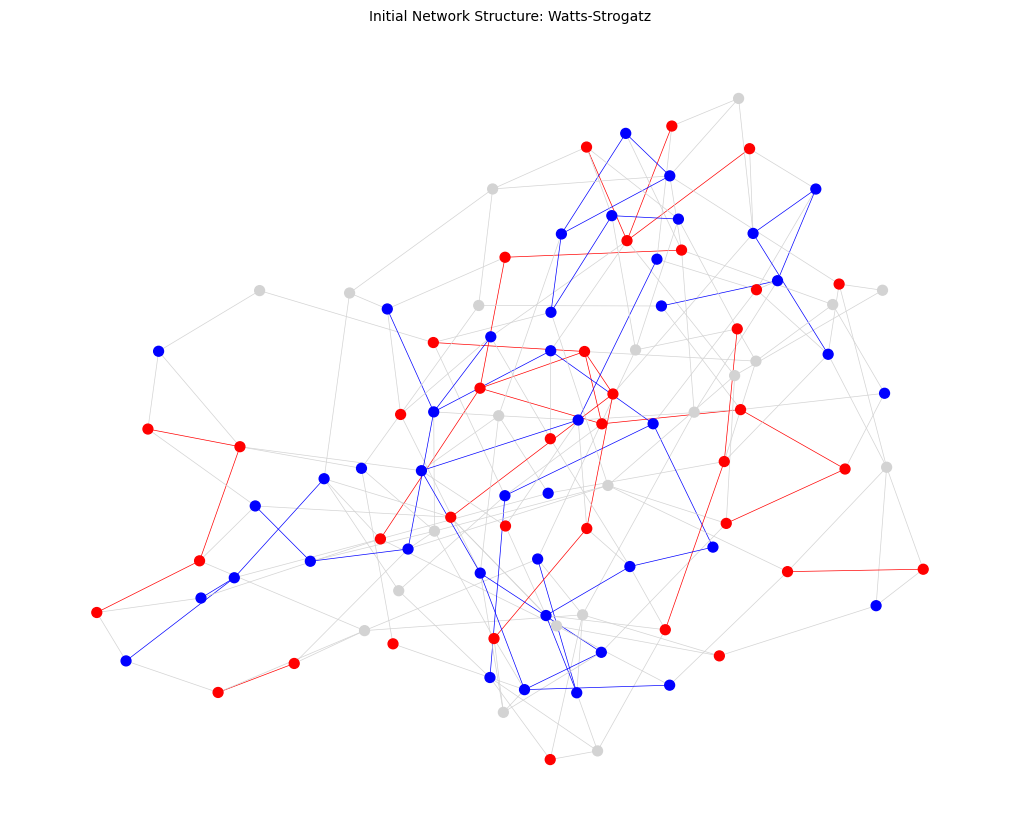

In [5]:
G = nx.watts_strogatz_graph(100, 5, 0.3)
init_network(G)

PATH_TO_INIT_SW_NETWORK = 'results/initial_small_world_network.png'
plot_network(G, PATH_TO_INIT_SW_NETWORK, 'Initial Network Structure: Watts-Strogatz')
display(Image(filename=PATH_TO_INIT_SW_NETWORK))

In [6]:
get_graph_properties(G)

Number of nodes: 100
Number of edges: 200
Average degree: 4.0
Average degree: 4.0
Density: 0.04040404040404041
Diameter: 7
Average shortest path length: 3.7256565656565654
Clustering coefficient: 0.15899999999999997


Minimum degree:  2
Maximum degree:  6
Average degree:  4.0


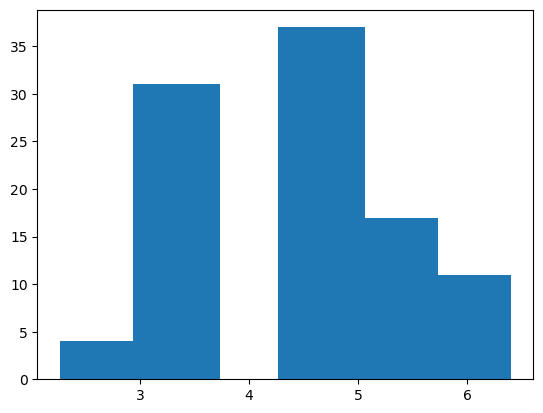

In [7]:
plot_degree_distribution(G)

In [8]:
def get_top_centralities(G, k=5):
    properties = get_node_properties(G)
    opinion_df = pd.DataFrame([(node, G.nodes[node]['opinion']) for node in G.nodes()],
                              columns=['Node', 'Opinion'])
    eig_df = pd.merge(properties, opinion_df, on='Node').nlargest(k, 'Eigenvector Centrality')
    deg_df = pd.merge(properties, opinion_df, on='Node').nlargest(k, 'Degree Centrality')
    closeness_df = pd.merge(properties, opinion_df, on='Node').nlargest(k, 'Closeness Centrality')
    
    print(f"Top {k} Closeness Central Nodes")
    display(closeness_df)
    
    print(f"Top {k} Eigenvector Central Nodes")
    display(eig_df)

    print(f"Top {k} Degree Central Nodes")
    display(deg_df)

get_top_centralities(G)

Top 5 Closeness Central Nodes


,Node,Degrees,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Average Shortest Path Length,Opinion
82,82,6,0.060606,0.323529,0.070444,0.253531,3.090909,N
32,32,6,0.060606,0.307453,0.061140,0.223236,3.252525,B
80,80,6,0.060606,0.307453,0.055574,0.199273,3.252525,B
27,27,4,0.040404,0.304615,0.048993,0.083090,3.282828,A
10,10,3,0.030303,0.302752,0.037789,0.097234,3.303030,B


Top 5 Eigenvector Central Nodes


,Node,Degrees,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Average Shortest Path Length,Opinion
83,83,6,0.060606,0.282857,0.037492,0.265983,3.535354,B
82,82,6,0.060606,0.323529,0.070444,0.253531,3.090909,N
32,32,6,0.060606,0.307453,0.061140,0.223236,3.252525,B
52,52,6,0.060606,0.298193,0.046882,0.220377,3.353535,N
85,85,6,0.060606,0.265416,0.028421,0.220265,3.767677,B


Top 5 Degree Central Nodes


,Node,Degrees,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Average Shortest Path Length,Opinion
8,8,6,0.060606,0.288630,0.057541,0.090160,3.464646,A
16,16,6,0.060606,0.283668,0.063368,0.068126,3.525253,N
32,32,6,0.060606,0.307453,0.061140,0.223236,3.252525,B
34,34,6,0.060606,0.276536,0.052016,0.115589,3.616162,A
52,52,6,0.060606,0.298193,0.046882,0.220377,3.353535,N


The `update_opinion` function modifies a user's political opinion within the network based on their neighbors' opinions. Here’s a breakdown of how it works:

- **Identify Neighbors**: It starts by finding all the neighbors (connected users) of the given node.

- **Collect Opinions**: The function gathers the opinions of these neighbors into a list.

- **Count Opinions**: It calculates the frequency of each opinion (A, B, N) among the neighbors by determining what proportion of neighbors hold each opinion.

- **Retrieve Current Opinion and Threshold**: The function retrieves the current opinion of the user (node) and their threshold for changing opinions.

- **Update Opinion and Threshold**: It checks each opinion against the user's current opinion. If a neighboring opinion has a frequency that meets or exceeds the user's threshold, or if a random chance (1%) occurs, the user's opinion is updated to the new opinion and corresponding threshold.

In [9]:
def update_opinion(G, node):
    neighbors = list(G.neighbors(node))
    neighbor_opinions = [
        G.nodes[neighbor]['opinion'] for neighbor in neighbors
    ]
    opinion_counts = {
        op: neighbor_opinions.count(op) / len(neighbors) for op in opinions
    }

    current_opinion = G.nodes[node]['opinion']
    threshold = G.nodes[node]['threshold']
    for op, freq in opinion_counts.items():
        if (
            (op != current_opinion and freq >= threshold)
            or random.random() <= random_chance_threshold
        ):
            G.nodes[node]['opinion'] = op
            if op in ['A', 'B']:
                G.nodes[node]['threshold'] = strong_opinion_threshold
            else:
                G.nodes[node]['threshold'] = neutral_opinion_threshold
            break

At each step of the simulation, people in the network may change their opinions based on what their friends think. After everyone updates their views, an image is saved to show the current state of opinions. This process illustrates how opinions change over time as people interact.

In [10]:
def simulate_network(G, time_steps, network_name='Network'):
    filenames = []
    for t in range(time_steps):
        for node in G.nodes():
            update_opinion(G, node)

        parent_directory = 'results/timesteps'
        if not os.path.exists(parent_directory):
            os.mkdir(parent_directory)

        directory = f"{parent_directory}/{network_name}"
        if not os.path.exists(directory):
            os.mkdir(directory)

        filename = f"{directory}/social_network_timestep_{t:03}.png"
        title = f"Time step: {t:03}: {network_name}"
        plot_network(G, filename, title)
        filenames.append(filename)

    PATH_TO_GIF = f'results/Political Opinions Evolution ({network_name}).gif'
    with imageio.get_writer(PATH_TO_GIF, mode='I', duration=0.3) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    return PATH_TO_GIF 

In [11]:
PATH_TO_GIF_SW = simulate_network(G, time_steps, 'Watts-Strogatz')

In [12]:
html_code = f"""
<div style="display: flex; justify-content: space-around;">
    <img src="{PATH_TO_INIT_SW_NETWORK}" style="width: 600px; height: auto;">
    <img src="{PATH_TO_GIF_SW}" style="width: 600px; height: auto;">
</div>
"""

# Display the HTML
display(HTML(html_code))

In [13]:
get_top_centralities(G)

Top 5 Closeness Central Nodes


,Node,Degrees,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Average Shortest Path Length,Opinion
82,82,6,0.060606,0.323529,0.070444,0.253531,3.090909,A
32,32,6,0.060606,0.307453,0.061140,0.223236,3.252525,A
80,80,6,0.060606,0.307453,0.055574,0.199273,3.252525,A
27,27,4,0.040404,0.304615,0.048993,0.083090,3.282828,A
10,10,3,0.030303,0.302752,0.037789,0.097234,3.303030,A


Top 5 Eigenvector Central Nodes


,Node,Degrees,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Average Shortest Path Length,Opinion
83,83,6,0.060606,0.282857,0.037492,0.265983,3.535354,A
82,82,6,0.060606,0.323529,0.070444,0.253531,3.090909,A
32,32,6,0.060606,0.307453,0.061140,0.223236,3.252525,A
52,52,6,0.060606,0.298193,0.046882,0.220377,3.353535,A
85,85,6,0.060606,0.265416,0.028421,0.220265,3.767677,A


Top 5 Degree Central Nodes


,Node,Degrees,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Average Shortest Path Length,Opinion
8,8,6,0.060606,0.288630,0.057541,0.090160,3.464646,A
16,16,6,0.060606,0.283668,0.063368,0.068126,3.525253,A
32,32,6,0.060606,0.307453,0.061140,0.223236,3.252525,A
34,34,6,0.060606,0.276536,0.052016,0.115589,3.616162,A
52,52,6,0.060606,0.298193,0.046882,0.220377,3.353535,A


Similarly, we compare the simulation using the Barabási-Albert model consists of 100 users and is designed to reflect a scale-free network structure.

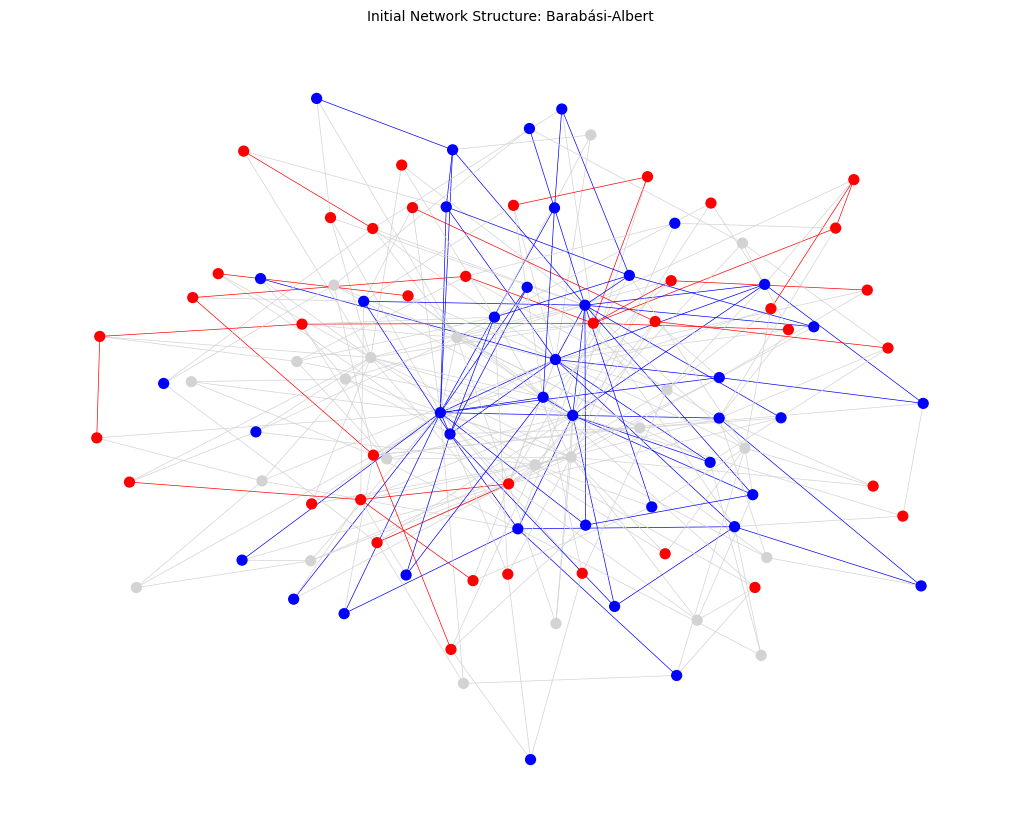

In [14]:
G2 =  nx.barabasi_albert_graph(100, 3)
init_network(G2)

PATH_TO_INIT_BA_NETWORK = 'results/initial_barabasi_albert.png'
plot_network(G2, PATH_TO_INIT_BA_NETWORK, 'Initial Network Structure: Barabási-Albert')
display(Image(filename=PATH_TO_INIT_BA_NETWORK))

In [15]:
get_graph_properties(G2)

Number of nodes: 100
Number of edges: 291
Average degree: 5.82
Average degree: 5.82
Density: 0.058787878787878785
Diameter: 4
Average shortest path length: 2.5765656565656565
Clustering coefficient: 0.14166389269111712


Minimum degree:  3
Maximum degree:  27
Average degree:  5.82


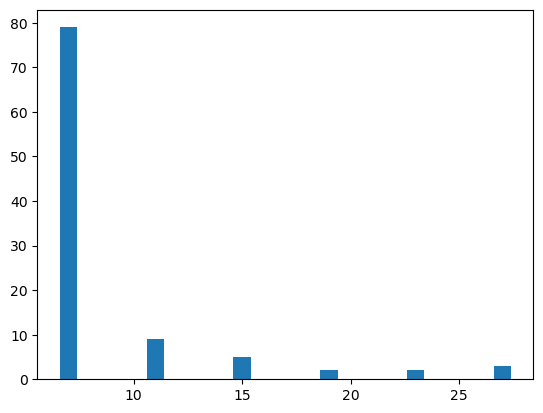

In [16]:
plot_degree_distribution(G2)

In [17]:
get_top_centralities(G2)

Top 5 Closeness Central Nodes


,Node,Degrees,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Average Shortest Path Length,Opinion
0,0,24,0.242424,0.550000,0.163081,0.330343,1.818182,B
3,3,23,0.232323,0.543956,0.145970,0.313414,1.838384,B
4,4,27,0.272727,0.543956,0.196459,0.327980,1.838384,B
2,2,19,0.191919,0.505102,0.103913,0.219609,1.979798,N
5,5,14,0.141414,0.502538,0.061715,0.230141,1.989899,N


Top 5 Eigenvector Central Nodes


,Node,Degrees,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Average Shortest Path Length,Opinion
0,0,24,0.242424,0.550000,0.163081,0.330343,1.818182,B
4,4,27,0.272727,0.543956,0.196459,0.327980,1.838384,B
3,3,23,0.232323,0.543956,0.145970,0.313414,1.838384,B
5,5,14,0.141414,0.502538,0.061715,0.230141,1.989899,N
12,12,19,0.191919,0.485294,0.091281,0.223025,2.060606,B


Top 5 Degree Central Nodes


,Node,Degrees,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Average Shortest Path Length,Opinion
4,4,27,0.272727,0.543956,0.196459,0.327980,1.838384,B
0,0,24,0.242424,0.550000,0.163081,0.330343,1.818182,B
3,3,23,0.232323,0.543956,0.145970,0.313414,1.838384,B
2,2,19,0.191919,0.505102,0.103913,0.219609,1.979798,N
12,12,19,0.191919,0.485294,0.091281,0.223025,2.060606,B


In [18]:
PATH_TO_GIF_BA = simulate_network(G2, time_steps, 'Barabási-Albert')

In [19]:
html_code = f"""
<div style="display: flex; justify-content: space-around;">
    <img src="{PATH_TO_INIT_BA_NETWORK}" style="width: 600px; height: auto;">
    <img src="{PATH_TO_GIF_BA}" style="width: 600px; height: auto;">
</div>
"""

# Display the HTML
display(HTML(html_code))

In [20]:
get_top_centralities(G2)

Top 5 Closeness Central Nodes


,Node,Degrees,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Average Shortest Path Length,Opinion
0,0,24,0.242424,0.550000,0.163081,0.330343,1.818182,B
3,3,23,0.232323,0.543956,0.145970,0.313414,1.838384,B
4,4,27,0.272727,0.543956,0.196459,0.327980,1.838384,B
2,2,19,0.191919,0.505102,0.103913,0.219609,1.979798,B
5,5,14,0.141414,0.502538,0.061715,0.230141,1.989899,B


Top 5 Eigenvector Central Nodes


,Node,Degrees,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Average Shortest Path Length,Opinion
0,0,24,0.242424,0.550000,0.163081,0.330343,1.818182,B
4,4,27,0.272727,0.543956,0.196459,0.327980,1.838384,B
3,3,23,0.232323,0.543956,0.145970,0.313414,1.838384,B
5,5,14,0.141414,0.502538,0.061715,0.230141,1.989899,B
12,12,19,0.191919,0.485294,0.091281,0.223025,2.060606,B


Top 5 Degree Central Nodes


,Node,Degrees,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Average Shortest Path Length,Opinion
4,4,27,0.272727,0.543956,0.196459,0.327980,1.838384,B
0,0,24,0.242424,0.550000,0.163081,0.330343,1.818182,B
3,3,23,0.232323,0.543956,0.145970,0.313414,1.838384,B
2,2,19,0.191919,0.505102,0.103913,0.219609,1.979798,B
12,12,19,0.191919,0.485294,0.091281,0.223025,2.060606,B


## Insights

In this implementation of the Echo Chamber, it was observed that one popular opinion tends to dominate the entire network. It is heavily influenced by the initial random assignment of opinions. The node centralities and the number of degrees each node has plays a big part in the result of the simulations for both the Barabási-Albert and Watts-Strogatz models.

This phenomenon can be attributed to the network's structure, where highly connected nodes facilitate the rapid spread of particular opinions, reinforcing them through social interactions. The echo chamber effect plays a crucial role, as individuals are exposed primarily to viewpoints similar to their own, creating clusters that further entrench the dominant opinion. Additionally, initial conditions heavily influence the outcome; if influential nodes begin with a strong opinion, they can sway neighboring nodes, leading to a tipping point where dissenting views struggle to emerge.